Name : Depatla Hemika Reddy

Reg.No : 21BAI1538

Gmail : depatlahemika.reddy2021@vitstudent.ac.in

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Data Preprocessing and Understanding

In [11]:
data = pd.read_csv(r'/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data.shape

(200, 5)

In [13]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data Visualization

In [16]:
#dropping the customer id column
data.drop(columns = 'CustomerID',inplace = True)

In [17]:
categorical_features = []
numerical_features = []
for i in data.columns:
    if data[i].dtype =='int' :
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('The Numerical Features are : ' ,numerical_features)

print('The Categorical Features are : ',categorical_features)

The Numerical Features are :  ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
The Categorical Features are :  ['Gender']


UniVariate Analysis

Histogram

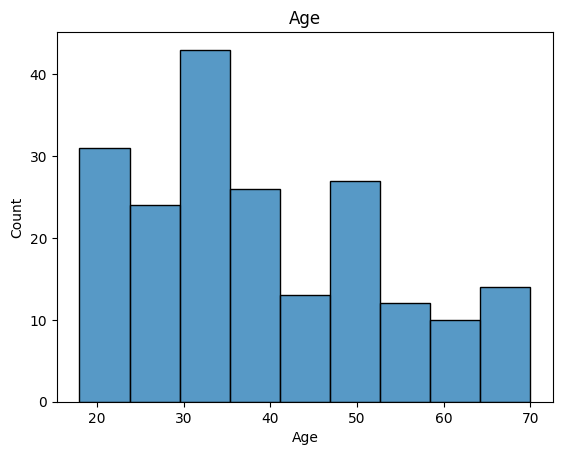

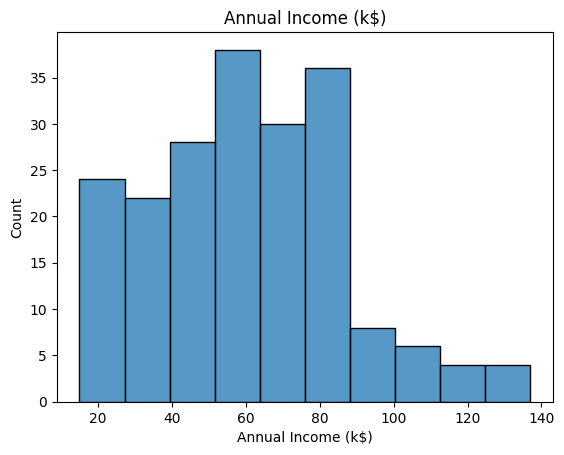

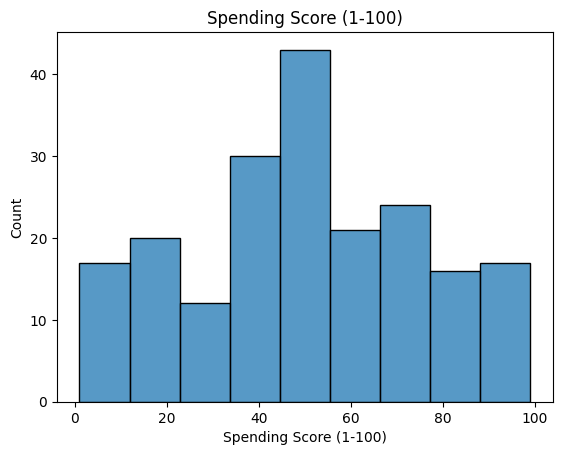

In [18]:
for i in numerical_features :
  sns.histplot(data[i])
  plt.title(i)
  plt.show()

In [19]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Pie chart

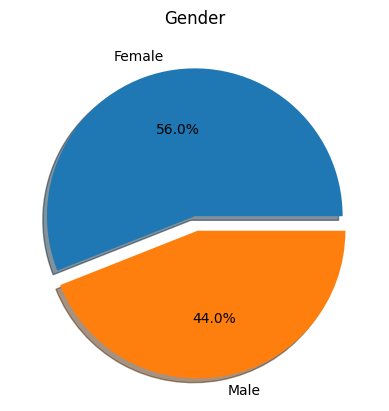

In [20]:
plt.pie(data.Gender.value_counts(),[0,0.1],labels=['Female','Male'],autopct ='%1.1f%%',shadow = True)
plt.title('Gender')
plt.show()

BiVariate Analysis

Bar Plot

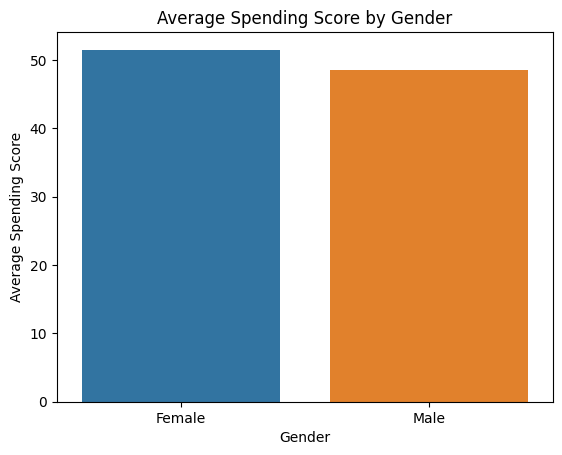

In [21]:
mean_scores = data.groupby('Gender')['Spending Score (1-100)'].mean()

sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Gender')
plt.show()

Line plot

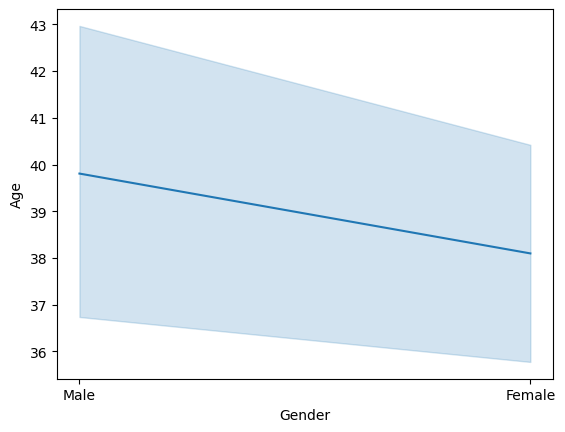

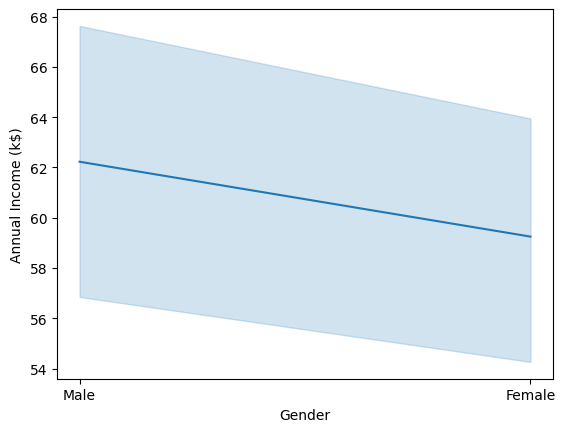

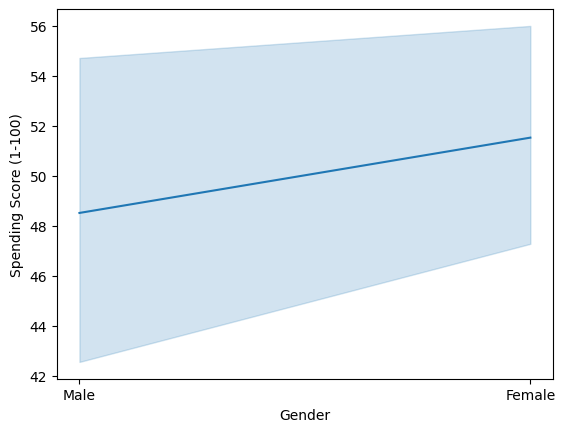

In [22]:
for i in numerical_features :
  sns.lineplot(x = data.Gender,y=data[i])
  plt.show()

Box Plot

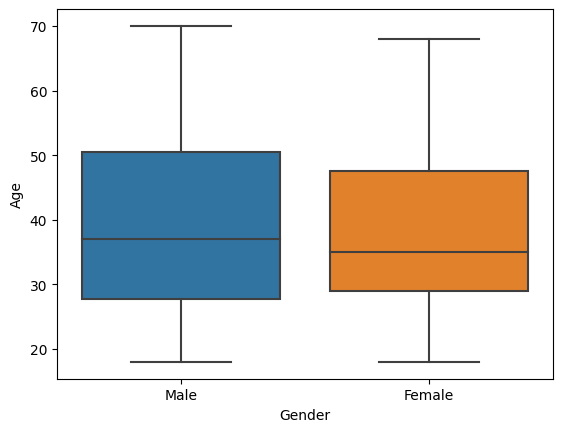

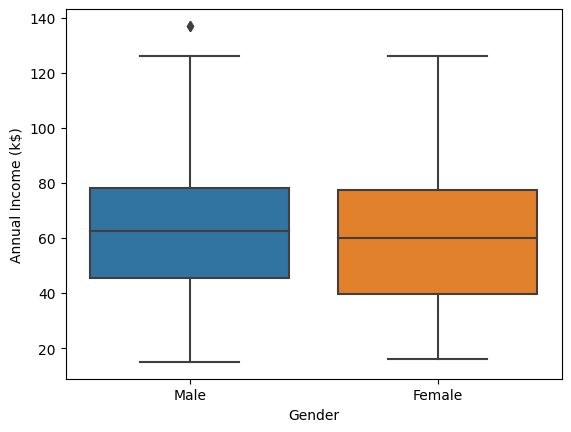

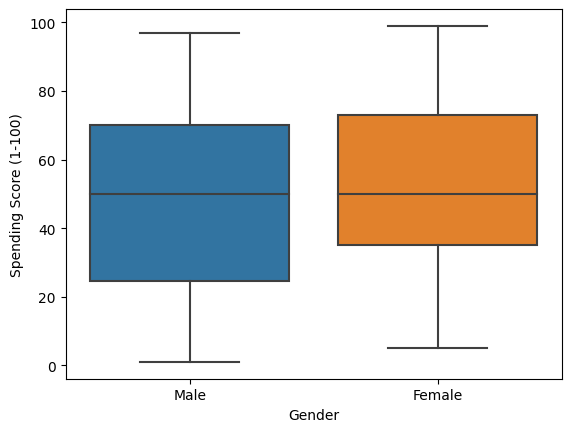

In [23]:
for i in numerical_features :
  sns.boxplot(x = data.Gender,y=data[i])
  plt.show()

Multivariate Variate Analysis

Pairplot

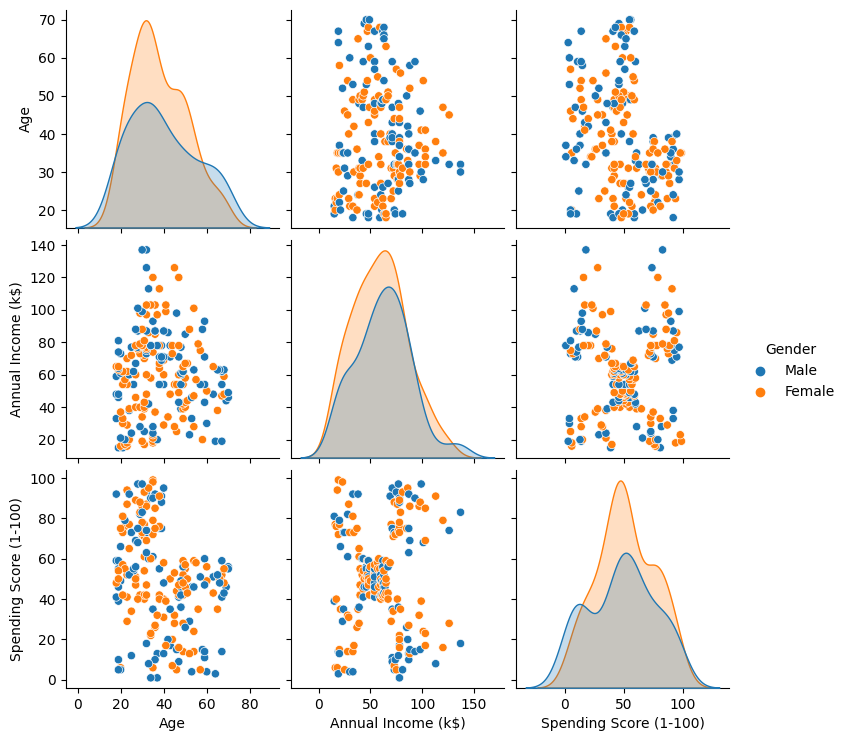

In [24]:
sns.pairplot(data,hue='Gender')

Heat Map

<Axes: >

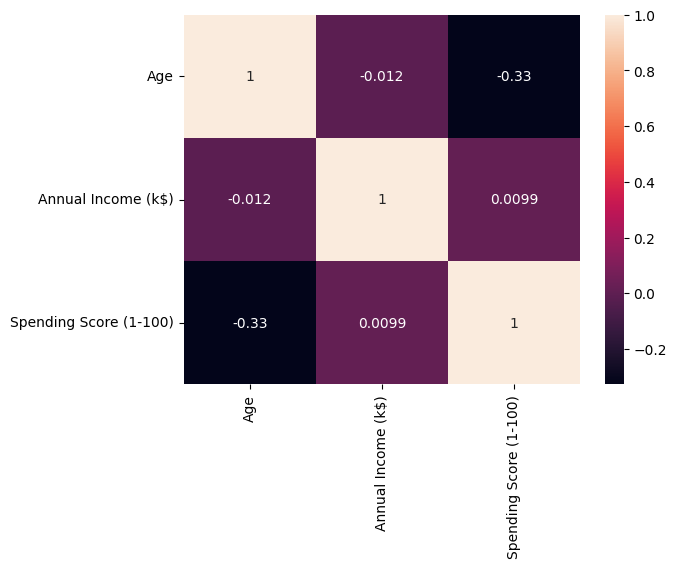

In [25]:
sns.heatmap(data.corr(),annot=True)

Machine Learning approach with clustering algorithm

Model Building

In [26]:
from sklearn.cluster import KMeans

In [27]:
# encoding the gender column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

In [28]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [29]:
new_data = data.iloc[:,[2,3]]
new_data.tail()

,Annual Income (k$),Spending Score (1-100)
195,120,79
196,126,28
197,126,74
198,137,18
199,137,83


In [30]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(new_data)
  wcss.append(kmeans.inertia_)

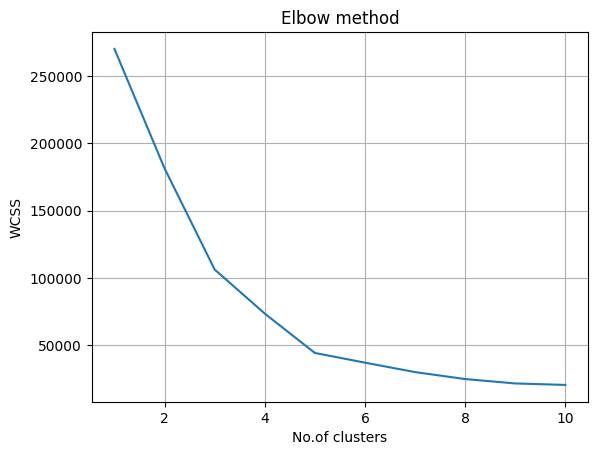

In [31]:
plt.plot(range(1,11),wcss)
plt.grid(True)
plt.title('Elbow method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
knn_model = KMeans(n_clusters=5,init = 'k-means++',random_state=0)

In [33]:
knn_model.fit(new_data)

KMeans(n_clusters=5, random_state=0)

In [34]:
#predicting the output
model_pred = knn_model.fit_predict(new_data)
model_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [35]:
# Test the model with random observation

knn_model.predict([[17,40]])

array([4], dtype=int32)

In [36]:
knn_model.predict([[137,83]])

array([2], dtype=int32)

In [37]:
new_data['model_pred']  = model_pred

plotting the clusters

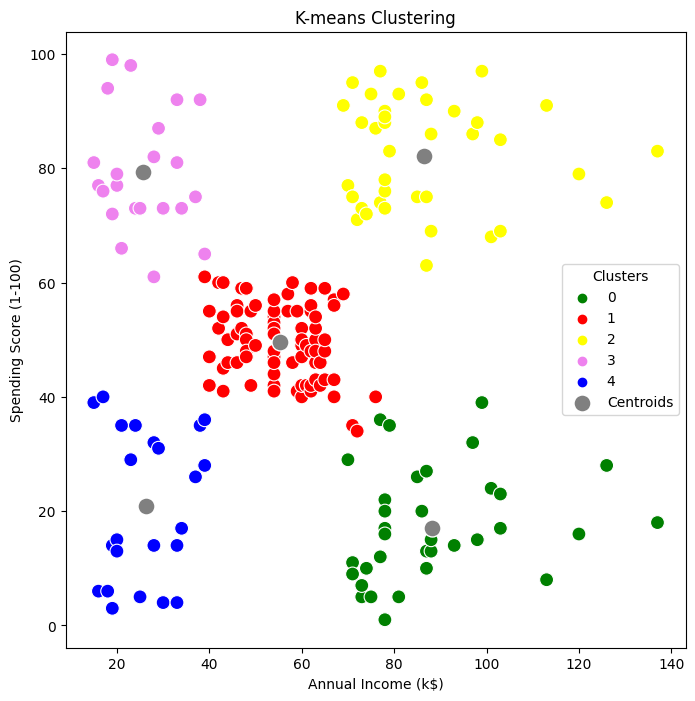

In [39]:
plt.figure(figsize=(8, 8))
colors = ['green', 'red', 'yellow', 'violet', 'blue']
centroids = knn_model.cluster_centers_
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',s=100, hue= 'model_pred',
                palette=colors, data=new_data)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='grey', s=150,label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Clusters')
plt.show()